# Modelos de regresion lineal
## Modelo con datos simulados
# $y = \alpha +\beta*x$

## x: 100 valores distribuidos segun una N(1.5, 2.5)
## ye: 5 + 1.9*x + error
## e: estara distribuida segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5*np.random.randn(100)

In [3]:
error = 0 + 0.8*np.random.randn(100)

In [4]:
y_pred = 5 + 1.9*x

In [5]:
y_act = 5 + 1.9*x + error

In [6]:
x_list, y_pred_list, y_act_list = x.tolist(), y_pred.tolist(), y_act.tolist()

In [11]:
data = pd.DataFrame(
    {
        'x':x_list,
        'y':y_act_list,
        'y_pred':y_pred_list
    }
)

In [12]:
data.head()

,x,y,y_pred
0,-2.970223,-0.335664,-0.643424
1,2.672801,9.898286,10.078321
2,6.012116,18.915595,16.423020
3,1.258877,7.759855,7.391867
4,1.417245,7.811345,7.692765


In [20]:
import matplotlib.pyplot as plt

In [23]:
y_mean = [np.mean(data['y']) for _ in range(1, len(data)+1)]

Text(0.5, 1.0, 'Valor actual vs. Prediccion')

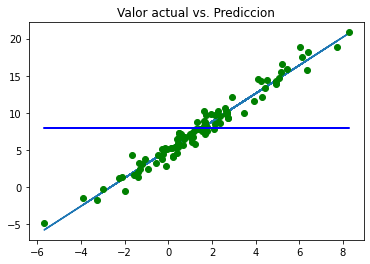

In [24]:
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], 'go')
plt.plot(data['x'], y_mean,'b')
plt.title('Valor actual vs. Prediccion')

In [25]:
data['SSR'] = (data['y_pred'] - np.mean(y_act))**2
data['SSD'] = (data['y_pred'] - data['y'])**2
data['SST'] = (data['y'] - np.mean(data['y']))**2

In [26]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,-2.970223,-0.335664,-0.643424,72.933692,0.094717,67.771781
1,2.672801,9.898286,10.078321,4.759480,0.032413,4.006353
2,6.012116,18.915595,16.423020,72.698157,6.212932,121.416086
3,1.258877,7.759855,7.391867,0.254855,0.135415,0.018726
4,1.417245,7.811345,7.692765,0.041589,0.014061,0.007285


In [27]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [28]:
SST

2336.720749232118

In [29]:
SSD

81.9935031814123

In [30]:
SSR

2219.136002162232

In [31]:
SSD + SSR

2301.1295053436447

In [32]:
R2 = SSR/SST

In [33]:
R2

0.9496795896092736

(array([ 3.,  2.,  7., 14., 16., 21., 16., 12.,  6.,  3.]),
 array([-2.49257535, -2.04331799, -1.59406063, -1.14480327, -0.69554591,
        -0.24628855,  0.20296882,  0.65222618,  1.10148354,  1.5507409 ,
         1.99999826]),
 <BarContainer object of 10 artists>)

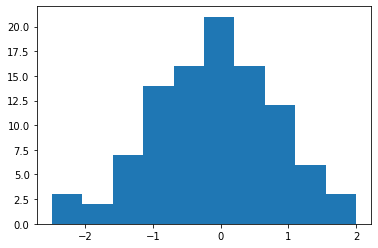

In [35]:
plt.hist(data['y_pred']- data['y'])

## Obteniendo la recta de la regresion

# $y = \alpha + \beta*x$

# $\beta = \frac{\sum(xi -\bar{x})(yi -\bar{y})}{\sum(xi - \bar{x})^2}$

# $\alpha = \bar{y}-\beta*\bar{x}$

In [37]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])
x_mean, y_mean

(1.4766277647645658, 7.896698252945257)

In [38]:
data['beta_n'] = (data['x'] - x_mean)*(data['y'] - y_mean)
data['beta_d'] = (data['x'] - x_mean)**2

In [39]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [40]:
alpha = y_mean - (beta * x_mean)

In [41]:
print(f'y = {alpha} + {beta}*x')

y = 5.067548799461624 + 1.9159530390752972*x


In [59]:
data['y_model'] = alpha + beta * data['x']

In [52]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-2.970223,-0.335664,-0.643424,72.933692,0.094717,67.771781,36.608087,19.774484,-0.623260
1,2.672801,9.898286,10.078321,4.759480,0.032413,4.006353,2.394245,1.430830,10.188510
2,6.012116,18.915595,16.423020,72.698157,6.212932,121.416086,49.976073,20.570650,16.586480
3,1.258877,7.759855,7.391867,0.254855,0.135415,0.018726,0.029798,0.047415,7.479499
4,1.417245,7.811345,7.692765,0.041589,0.014061,0.007285,0.005069,0.003526,7.782923


In [53]:
SSR = sum((data['y_model'] - y_mean)**2)
SSD = sum((data['y_model'] - data['y'])**2)
SST = sum((data['y'] - y_mean)**2)

In [54]:
SSR, SSD, SST

(2255.713654426543, 81.00709480557659, 2336.720749232118)

In [55]:
SSR + SSD

2336.72074923212

In [56]:
R2 = SSR / SST

In [57]:
R2

0.9653330014584776

Text(0.5, 1.0, 'Valor actual vs. Prediccion')

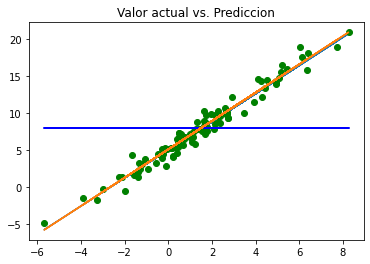

In [61]:
y_meanVal = [np.mean(data['y']) for _ in range(1, len(data)+1)]
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], 'go')
plt.plot(data['x'], y_meanVal,'b')
plt.plot(data['x'], data['y_model'])
plt.title('Valor actual vs. Prediccion')

# Error estandar de los residuos (RSE)

In [62]:
RSE = np.sqrt(SSD/(len(data)-2))

In [63]:
RSE

0.9091771049801953